In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 维护状态，以及step函数的更新与返回值，state，reward，done以及其他信息
class MazeEnv(gym.Env):
    def __init__(self):
        self.state = 0
    def reset(self):
        self.state = 0
        return self.state
    def step(self, action):
        if action == 0:
            self.state = self.state - 3
        elif action == 1:
            self.state = self.state + 1
        elif action == 2:
            self.state = self.state + 3
        elif action == 3:
            self.state = self.state - 1
        done = True
        if self.state == 8:
            done = False
        return self.state, 1, done, {}
    

In [ ]:
# 选择action的策略，基于环境状态
class Agent:
    def __init__(self):
        self.theta_0 = np.asarray([[np.nan, 1, 1, np.nan],      # s0，表示能向右，向下走，不能向左向上走
                      [np.nan, 1, np.nan, 1],      # s1
                      [np.nan, np.nan, 1, 1],      # s2
                      [1, np.nan, np.nan, np.nan], # s3 
                      [np.nan, 1, 1, np.nan],      # s4
                      [1, np.nan, np.nan, 1],      # s5
                      [np.nan, 1, np.nan, np.nan], # s6 
                      [1, 1, np.nan, 1]]           # s7
                     )
        self.actions = list(range(4))
    def get_action_probs(self):
        action_probs = np.zeros_like(self.theta_0)
        for s in range(self.theta_0.shape[0]):
            valid_actions = np.where(~np.isnan(self.theta_0[s]))[0]
            action_probs[s, valid_actions] = 1 / len(valid_actions)
        return action_probs
    def choose_action(self, state):
        action = np.random.choice(self.actions, p=self.get_action_probs()[state])
        return action

In [52]:
env = MazeEnv()
agent = Agent()
state = env.reset()

In [53]:
done = True
action_history = []
state_history = [state]
while done:
    action = agent.choose_action(state)
    state, reward, done, _ = env.step(action)
    action_history.append(action)
    state_history.append(state)

print(state_history)

[0, 1, 2, 1, 0, 1, 2, 5, 2, 5, 4, 5, 4, 7, 4, 5, 4, 7, 6, 7, 8]


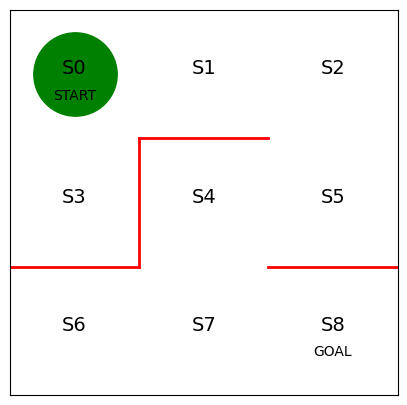

In [54]:
# 可视化创建的环境
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# plt.axis('off')
plt.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                right=False, left=False,
                labelbottom=False, labelleft=False
               )
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [55]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line, )
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data([x], [y])

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
anim.save('maze_animation.gif')
HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.
